In [41]:
import pandas as pd
import matplotlib.pylab as plt

#### used below sql to create new table
```
SELECT * from

(SELECT *, CONCAT(b.start_station_name, ',', b.end_station_name) as tripss
FROM `bigquery-public-data.san_francisco.bikeshare_trips` as b)
where tripss in (('Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome'), ('San Francisco Caltrain 2 (330 Townsend),Townsend at 7th'), ('2nd at Townsend,Harry Bridges Plaza (Ferry Building)'), ('Harry Bridges Plaza (Ferry Building),2nd at Townsend'), ('Embarcadero at Sansome,Steuart at Market'))
```

## What are the 5 most popular trips that you would call "commuter trips"?

In [75]:
### saving a query to csv
!bq query --use_legacy_sql=false --format=csv 'SELECT tripss, count(trip_id) as rides FROM `shining-grid-239902.bqas4.realfamous` group by tripss order by rides desc' > random3.csv

Waiting on bqjob_r7272c5ba0c301e48_0000016b353a5dea_1 ... (0s) Current status: DONE   

In [76]:
jj_trips=pd.read_csv('random3.csv', index_col = False)
jj_trips

,tripss,rides
0,"Harry Bridges Plaza (Ferry Building),Embarcade...",9150
1,"San Francisco Caltrain 2 (330 Townsend),Townse...",8508
2,"2nd at Townsend,Harry Bridges Plaza (Ferry Bui...",7620
3,"Harry Bridges Plaza (Ferry Building),2nd at To...",6888
4,"Embarcadero at Sansome,Steuart at Market",6874


In [77]:
### resetting index for the plot
jj_trips.index = jj_trips.tripss

## Harry Bridges Plaza to Embarcadero was the most popular commuter trip with 9150 rides, please refer to the below histogram for the 5 most popular commuter trips

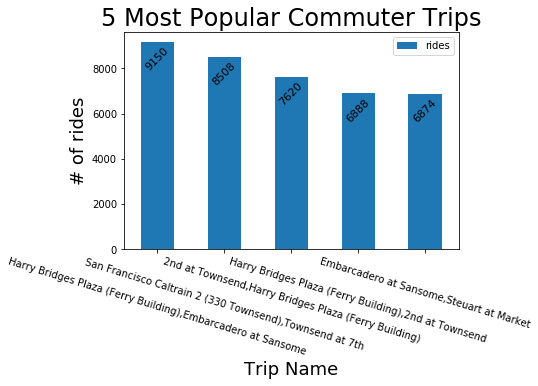

In [79]:
eastern = jj_trips.rides.plot(y='rides',kind='bar', legend = True)
plt.title('5 Most Popular Commuter Trips',fontsize=24)
plt.ylabel('# of rides',fontsize=18,color='black')
plt.xlabel('Trip Name',fontsize=18,color='black')
plt.xticks(rotation = -17)

for i in eastern.patches:
    eastern.text(i.get_x()+.04, i.get_height()-500, \
            str(round((i.get_height()), 2)), fontsize=11, color='black',
                rotation=45)


    

## What are your recommendations for offers (justify based on your findings)?

In [82]:
### if we cut the above results by subscriber_type, we can see that HBP to Embrcadero had strong number of customers, 
### while other stations did not. Those will not be a good spot for offers.

!bq query --use_legacy_sql=false 'SELECT tripss, subscriber_type, count(trip_id) as rides from `shining-grid-239902.bqas4.realfamous` where subscriber_type = "Customer" group by tripss, subscriber_type order by rides desc'

Waiting on bqjob_r736674742a935c77_0000016b354784e6_1 ... (0s) Current status: DONE   
+-------------------------------------------------------------+-----------------+-------+
|                           tripss                            | subscriber_type | rides |
+-------------------------------------------------------------+-----------------+-------+
| Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome | Customer        |  3667 |
| 2nd at Townsend,Harry Bridges Plaza (Ferry Building)        | Customer        |   689 |
| Embarcadero at Sansome,Steuart at Market                    | Customer        |   674 |
| Harry Bridges Plaza (Ferry Building),2nd at Townsend        | Customer        |   556 |
| San Francisco Caltrain 2 (330 Townsend),Townsend at 7th     | Customer        |   203 |
+-------------------------------------------------------------+-----------------+-------+


In [83]:
### new query to look at popular customer trips

!bq query --use_legacy_sql=false 'SELECT tripss, subscriber_type, count(trip_id) as rides from `shining-grid-239902.bqas4.bigtable` where subscriber_type = "Customer" group by tripss, subscriber_type order by rides desc limit 5'

Waiting on bqjob_r349f36580605f6b1_0000016b354db394_1 ... (0s) Current status: DONE   
+---------------------------------------------------------------------------+-----------------+-------+
|                                  tripss                                   | subscriber_type | rides |
+---------------------------------------------------------------------------+-----------------+-------+
| Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome               | Customer        |  3667 |
| Embarcadero at Sansome,Embarcadero at Sansome                             | Customer        |  2545 |
| Harry Bridges Plaza (Ferry Building),Harry Bridges Plaza (Ferry Building) | Customer        |  2004 |
| Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building)               | Customer        |  1638 |
| Embarcadero at Vallejo,Embarcadero at Sansome                             | Customer        |  1345 |
+---------------------------------------------------------------------------+----

### visualizing the trips

In [84]:
### saving to csv
!bq query --use_legacy_sql=false --format=csv 'SELECT tripss, subscriber_type, count(trip_id) as rides from `shining-grid-239902.bqas4.bigtable` where subscriber_type = "Customer" group by tripss, subscriber_type order by rides desc limit 5' > random5.csv

Waiting on bqjob_r298167b5fc3069f2_0000016b354f3a8a_1 ... (0s) Current status: DONE   

In [85]:
zz_trips=pd.read_csv('random5.csv', index_col = False)
zz_trips.index = jj_trips.tripss

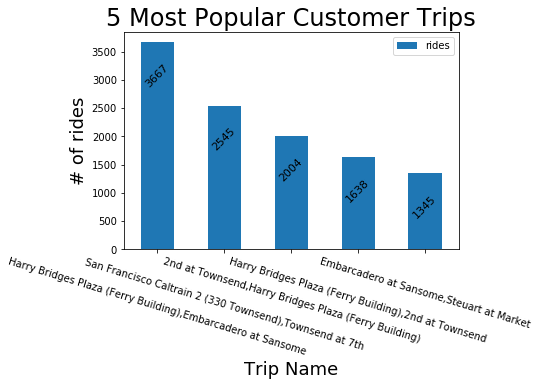

In [88]:
northern = zz_trips.rides.plot(y='rides',kind='bar', legend = True)
plt.title('5 Most Popular Customer Trips',fontsize=24)
plt.ylabel('# of rides',fontsize=18,color='black')
plt.xlabel('Trip Name',fontsize=18,color='black')
plt.xticks(rotation = -17)

for i in northern.patches:
    northern.text(i.get_x()+.04, i.get_height()-500, \
            str(round((i.get_height()), 2)), fontsize=11, color='black',
                rotation=45)

## Looking at the average time it takes for each trips, we can tell that top 3 trips all take more than 30 minutes to 2 hours.
### Therefore, we would recommend a flat price for a single one-way trip to capture more than 8,000 rides

In [90]:
!bq query --use_legacy_sql=false 'SELECT tripss, subscriber_type, count(trip_id) as rides, avg(duration_sec) as average_sec from `shining-grid-239902.bqas4.bigtable` where subscriber_type = "Customer" group by tripss, subscriber_type order by rides desc limit 5'

Waiting on bqjob_r3d358e3228fece87_0000016b3558ee89_1 ... (0s) Current status: DONE   
+---------------------------------------------------------------------------+-----------------+-------+--------------------+
|                                  tripss                                   | subscriber_type | rides |    average_sec     |
+---------------------------------------------------------------------------+-----------------+-------+--------------------+
| Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome               | Customer        |  3667 | 2283.8549222798006 |
| Embarcadero at Sansome,Embarcadero at Sansome                             | Customer        |  2545 |  4724.206679764243 |
| Harry Bridges Plaza (Ferry Building),Harry Bridges Plaza (Ferry Building) | Customer        |  2004 | 6802.4770459081965 |
| Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building)               | Customer        |  1638 | 1679.1282051282058 |
| Embarcadero at Vallejo,Embarcadero a